## Classification

In [39]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#### organize the data

In [8]:
# Define input and output paths
inputDir = '/home/jovyan/high-dimensionality-prediction/DataCSVs/'
outputFile = '/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels_classification.csv'

# Initialize an empty DataFrame to collect all data
columnNames = ['SubID', 'Session', 'ScanType', 'Region', 'Voxels', 'Volume_mm3', 'Percent_of_Total']
particFrame = pd.DataFrame(columns=columnNames)

# Loop through files in the input directory
for file in os.listdir(inputDir):
    if not file.startswith('OAS2'):
        continue
    if not any(session in file for session in ['MR1', 'MR3']):
        continue
    if not file.endswith('.csv'):
        continue

    # Extract subject ID and session
    particID = file[:9]            # e.g., "OAS2_0002"
    particSession = file[10:13]    # e.g., "MR1"

    # Read the participant's CSV
    curFrame = pd.read_csv(os.path.join(inputDir, file), index_col=0)

    # Reset index to make 'Region' a column
    curFrame = curFrame.reset_index().rename(columns={"index": "Region"})

    # Add metadata columns
    curFrame['SubID'] = particID
    curFrame['Session'] = particSession
    curFrame['ScanType'] = particSession  # MR1/MR2/MR3

    # Reorder columns to match final format
    curFrame = curFrame[['SubID', 'Session', 'ScanType', 'Region', 'Voxels', 'Volume_mm3', 'Percent_of_Total']]

    # Append to the main dataframe
    particFrame = pd.concat([particFrame, curFrame], ignore_index=True)

/tmp/ipykernel_254/1777831756.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  particFrame = pd.concat([particFrame, curFrame], ignore_index=True)


In [9]:
regionsOfNote= ['CSF',
'entorhinal',
'Amygdala',
'Hippocampus',
'supramarginal',
'Inf-Lat-Vent',
'precentral',
'precuneus',
'fusiform',
'lingual',
'superiortemporal',
'lateraloccipital',
'inferiortemporal',
'middletemporal',
'inferiorparietal',
'superiorfrontal',
'Cerebellum-Cortex',
'WM-hypointensities',
'Lateral-Ventricle',
'Cerebral-White-Matter']

delta_regions = ["delta_" + reg for reg in regionsOfNote]
delta_regions

['delta_CSF',
 'delta_entorhinal',
 'delta_Amygdala',
 'delta_Hippocampus',
 'delta_supramarginal',
 'delta_Inf-Lat-Vent',
 'delta_precentral',
 'delta_precuneus',
 'delta_fusiform',
 'delta_lingual',
 'delta_superiortemporal',
 'delta_lateraloccipital',
 'delta_inferiortemporal',
 'delta_middletemporal',
 'delta_inferiorparietal',
 'delta_superiorfrontal',
 'delta_Cerebellum-Cortex',
 'delta_WM-hypointensities',
 'delta_Lateral-Ventricle',
 'delta_Cerebral-White-Matter']

In [10]:
particFrame =particFrame[particFrame.Region.isin(regionsOfNote)]

particFrame

,SubID,Session,ScanType,Region,Voxels,Volume_mm3,Percent_of_Total
1,OAS2_0002,MR1,MR1,Cerebral-White-Matter,471456,471456.0,2.810097
2,OAS2_0002,MR1,MR1,Cerebellum-Cortex,112516,112516.0,0.670648
3,OAS2_0002,MR1,MR1,superiorfrontal,50895,50895.0,0.303358
4,OAS2_0002,MR1,MR1,Lateral-Ventricle,48714,48714.0,0.290358
5,OAS2_0002,MR1,MR1,lateraloccipital,30891,30891.0,0.184125
...,...,...,...,...,...,...,...
3346,OAS2_0095,MR3,MR3,lingual,7123,7123.0,0.042456
3350,OAS2_0095,MR3,MR3,Inf-Lat-Vent,5266,5266.0,0.031388
3357,OAS2_0095,MR3,MR3,Amygdala,3043,3043.0,0.018138
3358,OAS2_0095,MR3,MR3,entorhinal,2647,2647.0,0.015777


In [15]:
test = particFrame.pivot_table(index=["SubID", "Session"], columns="Region", values="Percent_of_Total")
print(test.head())

Region             Amygdala       CSF  Cerebellum-Cortex  \
SubID     Session                                          
OAS2_0002 MR1      0.013411  0.013012           0.670648   
          MR3      0.010902  0.013840           0.642353   
OAS2_0005 MR1      0.020820  0.011194           0.695360   
          MR3      0.019282  0.011468           0.672805   
OAS2_0007 MR1      0.013560  0.008178           0.665194   

Region             Cerebral-White-Matter  Hippocampus  Inf-Lat-Vent  \
SubID     Session                                                     
OAS2_0002 MR1                   2.810097     0.036919      0.016683   
          MR3                   2.646524     0.033832      0.021690   
OAS2_0005 MR1                   2.347708     0.050914      0.021893   
          MR3                   2.220690     0.048292      0.028348   
OAS2_0007 MR1                   2.122003     0.038385      0.009716   

Region             Lateral-Ventricle  WM-hypointensities  entorhinal  \
SubID    

In [16]:
# Save the combined data to CSV
test.to_csv(outputFile,mode='w')

print("All participant voxel data saved to:")
print(outputFile)

All participant voxel data saved to:
/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels_classification.csv


#### add MMSE and labels to the cvs file

In [24]:
# Load data
demo_df = pd.read_csv("oasis2_longitudinal_demographics.csv")
classification_df = pd.read_csv("/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels_classification.csv")

# Create a merge key in the voxel-based data
classification_df['MRI_ID'] = classification_df['SubID'] + "_" + classification_df['Session']

# Create a similar key in the demographic data for matching
demo_df['MRI_ID'] = demo_df['MRI ID']

# Select relevant columns to merge
demo_subset = demo_df[['MRI_ID', 'Group', 'MMSE']]

# Merge on MRI_ID
merged_df = classification_df.merge(demo_subset, on='MRI_ID', how='left')

# Show shape and preview
merged_df.shape, merged_df[['SubID', 'Session', 'Group', 'MMSE']].head()

((66, 25),
        SubID Session        Group  MMSE
 0  OAS2_0002     MR1     Demented  23.0
 1  OAS2_0002     MR3     Demented  22.0
 2  OAS2_0005     MR1  Nondemented  28.0
 3  OAS2_0005     MR3  Nondemented  30.0
 4  OAS2_0007     MR1     Demented  28.0)

In [21]:
merged_df

,SubID,Session,Amygdala,CSF,Cerebellum-Cortex,Cerebral-White-Matter,Hippocampus,Inf-Lat-Vent,Lateral-Ventricle,WM-hypointensities,...,lingual,middletemporal,precentral,precuneus,superiorfrontal,superiortemporal,supramarginal,MRI_ID,Group,MMSE
0,OAS2_0002,MR1,0.013411,0.013012,0.670648,2.810097,0.036919,0.016683,0.290358,0.029188,...,0.085062,0.113225,0.145561,0.119919,0.303358,0.178874,0.122243,OAS2_0002_MR1,Demented,23.0
1,OAS2_0002,MR3,0.010902,0.013840,0.642353,2.646524,0.033832,0.021690,0.379014,0.037730,...,0.082701,0.103033,0.146717,0.116032,0.291884,0.168931,0.118268,OAS2_0002_MR3,Demented,22.0
2,OAS2_0005,MR1,0.020820,0.011194,0.695360,2.347708,0.050914,0.021893,0.344998,0.158393,...,0.072730,0.145441,0.130904,0.116813,0.273389,0.158525,0.104880,OAS2_0005_MR1,Nondemented,28.0
3,OAS2_0005,MR3,0.019282,0.011468,0.672805,2.220690,0.048292,0.028348,0.396144,0.200582,...,0.069320,0.140131,0.126690,0.112104,0.269872,0.156313,0.102085,OAS2_0005_MR3,Nondemented,30.0
4,OAS2_0007,MR1,0.013560,0.008178,0.665194,2.122003,0.038385,0.009716,0.189054,0.026453,...,0.068641,0.129610,0.136441,0.081545,0.283527,0.160950,0.105816,OAS2_0007_MR1,Demented,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,OAS2_0080,MR3,0.020415,0.009292,0.587374,2.293742,0.045407,0.013041,0.287747,0.071317,...,0.073671,0.139380,0.144792,0.108021,0.279385,0.179732,0.090194,OAS2_0080_MR3,Demented,28.0
62,OAS2_0090,MR1,0.020462,0.009334,0.627100,2.648556,0.051129,0.006437,0.198114,0.016040,...,0.089675,0.160187,0.139028,0.121909,0.278223,0.158256,0.113475,OAS2_0090_MR1,Nondemented,29.0
63,OAS2_0090,MR3,0.019920,0.009590,0.623661,2.582294,0.049579,0.007677,0.234741,0.017595,...,0.090688,0.161743,0.140017,0.122523,0.279146,0.158137,0.112456,OAS2_0090_MR3,Nondemented,30.0
64,OAS2_0095,MR1,0.020313,0.006849,0.676018,2.672863,0.052124,0.021917,0.367641,0.046104,...,0.096798,0.163299,0.165683,0.111324,0.312424,0.180727,0.113660,OAS2_0095_MR1,Nondemented,30.0


In [25]:
merged_df['Group'].unique()

array(['Demented', 'Nondemented', 'Converted'], dtype=object)

In [29]:
# Save the merged dataset to a new CSV file
output_path = "/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels_classification_with_labels.csv"
merged_df.to_csv(output_path, index=False)

output_path

'/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels_classification_with_labels.csv'

#### classification

In [43]:
# Load the final file with labels
df = pd.read_csv("/home/jovyan/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels_classification_with_labels.csv")

# Separate data by group for train/test split
train_df = df[df['Group'].isin(['Demented', 'Nondemented'])]
test_df = df[df['Group'] == 'Converted']

# Encode target labels: Nondemented-0, Demented-1
train_df['Label'] = train_df['Group'].map({'Nondemented': 0, 'Demented': 1})

# Define feature columns (exclude non-feature ones)
non_feature_cols = ['SubID', 'Session', 'Group', 'MMSE', 'MRI_ID', 'Label']
feature_cols = [col for col in train_df.columns if col not in non_feature_cols]

# Prepare training and test data
X_train = train_df[feature_cols]
y_train = train_df['Label']
X_test = test_df[feature_cols]

# Run a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on converted subjects
converted_preds = clf.predict(X_test)
converted_probs = clf.predict_proba(X_test)[:, 1]  # probability of Demented

# Add predictions to test_df for inspection
test_df = test_df.copy()
test_df['Predicted_Label'] = converted_preds
test_df['Predicted_Prob_Demented'] = converted_probs

test_df[['SubID', 'Session', 'Predicted_Label', 'Predicted_Prob_Demented']].head()

/tmp/ipykernel_254/532409923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Label'] = train_df['Group'].map({'Nondemented': 0, 'Demented': 1})


,SubID,Session,Predicted_Label,Predicted_Prob_Demented
12,OAS2_0018,MR1,0,0.44
13,OAS2_0018,MR3,1,0.51
14,OAS2_0020,MR1,0,0.05
15,OAS2_0020,MR3,0,0.40
18,OAS2_0031,MR1,0,0.29


In [44]:
test_df

,SubID,Session,Amygdala,CSF,Cerebellum-Cortex,Cerebral-White-Matter,Hippocampus,Inf-Lat-Vent,Lateral-Ventricle,WM-hypointensities,...,precentral,precuneus,superiorfrontal,superiortemporal,supramarginal,MRI_ID,Group,MMSE,Predicted_Label,Predicted_Prob_Demented
12,OAS2_0018,MR1,0.014442,0.009686,0.567007,2.040011,0.038278,0.010240,0.312680,0.022429,...,0.128049,0.095403,0.241643,0.174254,0.109690,OAS2_0018_MR1,Converted,30.0,0,0.44
13,OAS2_0018,MR3,0.013423,0.009489,0.555152,2.044624,0.037551,0.011098,0.332254,0.021815,...,0.128788,0.096554,0.239271,0.171554,0.108540,OAS2_0018_MR3,Converted,29.0,1,0.51
14,OAS2_0020,MR1,0.017947,0.008953,0.602531,2.416813,0.043190,0.010318,0.276011,0.034463,...,0.138825,0.102991,0.280172,0.165218,0.112551,OAS2_0020_MR1,Converted,29.0,0,0.05
15,OAS2_0020,MR3,0.015068,0.009590,0.601411,2.285808,0.038135,0.015306,0.328344,0.053948,...,0.135010,0.094974,0.270486,0.158101,0.107956,OAS2_0020_MR3,Converted,26.0,0,0.40
18,OAS2_0031,MR1,0.015938,0.007957,0.587273,2.108294,0.036806,0.017363,0.326610,0.034052,...,0.140584,0.091904,0.264084,0.173169,0.101417,OAS2_0031_MR1,Converted,30.0,0,0.29
19,OAS2_0031,MR3,0.014734,0.008303,0.562561,2.033627,0.034285,0.022811,0.376749,0.061858,...,0.139886,0.089478,0.259691,0.171000,0.101256,OAS2_0031_MR3,Converted,28.0,0,0.38
28,OAS2_0041,MR1,0.015610,0.007468,0.573832,2.310634,0.041711,0.004357,0.123817,0.014389,...,0.140071,0.094271,0.255668,0.169069,0.127220,OAS2_0041_MR1,Converted,27.0,0,0.35
29,OAS2_0041,MR3,0.014848,0.007743,0.573528,2.256119,0.039476,0.005066,0.132233,0.016713,...,0.136876,0.095189,0.252312,0.167829,0.126344,OAS2_0041_MR3,Converted,28.0,0,0.36


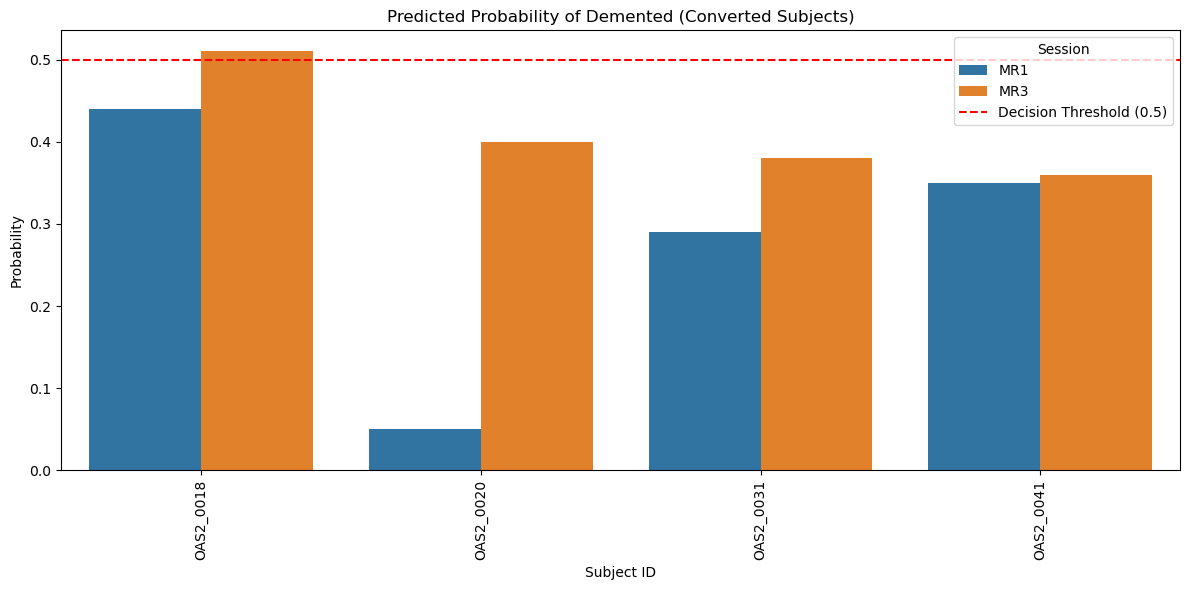

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort MR1 before MR3 and by probability
test_df['Session'] = pd.Categorical(test_df['Session'], categories=['MR1', 'MR3'], ordered=True)
test_df_sorted = test_df.sort_values(by=['Predicted_Prob_Demented', 'Session'], ascending=[False, True])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='SubID',
    y='Predicted_Prob_Demented',
    hue='Session',
    data=test_df_sorted,
    dodge=True
)

plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.title('Predicted Probability of Demented (Converted Subjects)')
plt.ylabel('Probability')
plt.xlabel('Subject ID')
plt.xticks(rotation=90)
plt.legend(title='Session')
plt.tight_layout()
plt.show()

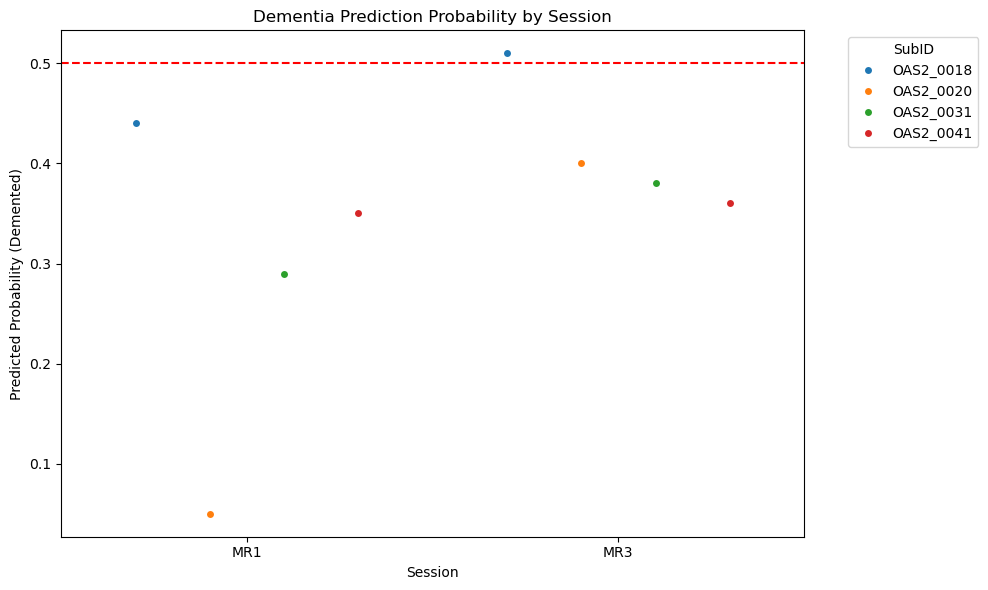

In [46]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Session',
    y='Predicted_Prob_Demented',
    data=test_df,
    jitter=True,
    hue='SubID',
    dodge=True,
    marker='o'
)

plt.axhline(0.5, color='red', linestyle='--')
plt.title('Dementia Prediction Probability by Session')
plt.ylabel('Predicted Probability (Demented)')
plt.xlabel('Session')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="SubID")
plt.tight_layout()
plt.show()


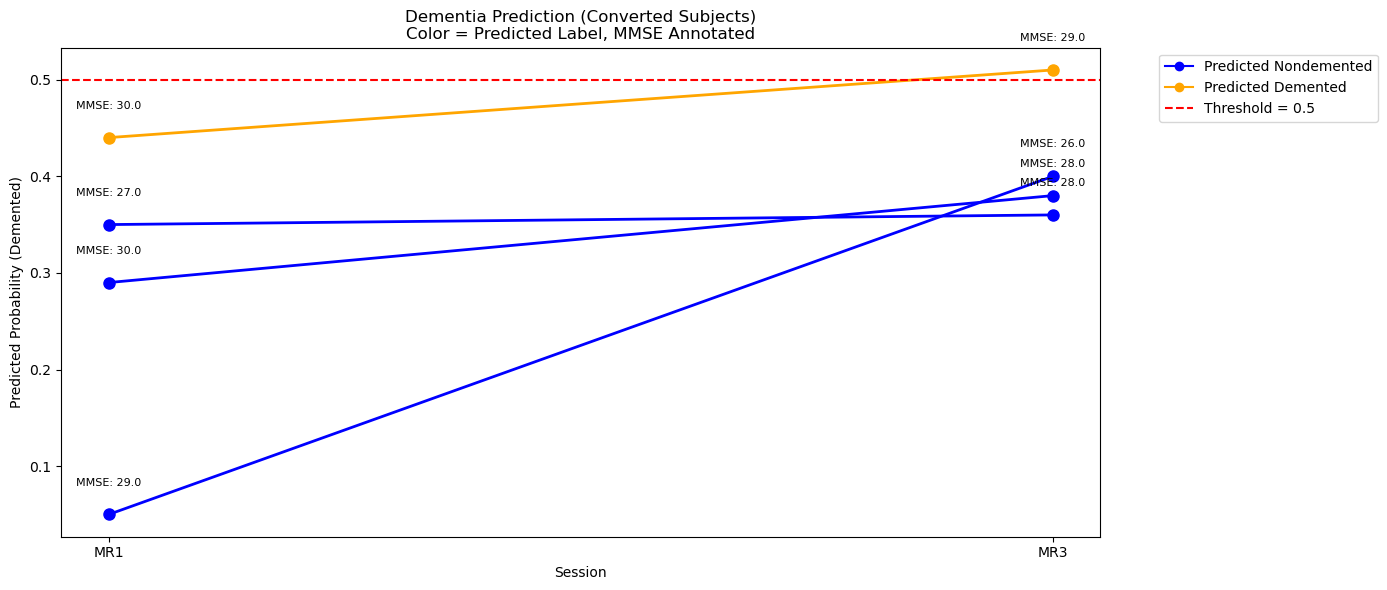

In [51]:
# Plot with color-coded points by predicted label and MMSE as annotation (not legend)

plt.figure(figsize=(14, 6))

# Sort data
test_df_sorted = test_df.sort_values(by=['SubID', 'Session'])

# Define color palette for predicted labels
palette = {0: 'blue', 1: 'orange'}

# Plot each subject's line and annotate with MMSE
for subid, group in test_df_sorted.groupby("SubID"):
    color = palette[group['Predicted_Label'].iloc[-1]]  # Use MR3 label if available

    # Draw connecting line between MR1 and MR3
    plt.plot(
        group['Session'],
        group['Predicted_Prob_Demented'],
        marker='o',
        color=color,
        linewidth=2,
        markersize=8
    )

    # Annotate MMSE for MR1 and MR3
    for i, row in group.iterrows():
        mmse_text = f"MMSE: {row['MMSE']}" if pd.notnull(row['MMSE']) else ""
        plt.text(
            row['Session'],
            row['Predicted_Prob_Demented'] + 0.03,  # slightly above point
            mmse_text,
            ha='center',
            fontsize=8,
            color='black'
        )

# Formatting
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Dementia Prediction (Converted Subjects)\nColor = Predicted Label, MMSE Annotated")
plt.ylabel("Predicted Probability (Demented)")
plt.xlabel("Session")
plt.xticks(ticks=[0, 1], labels=["MR1", "MR3"])
legend_handles = [plt.Line2D([0], [0], color='blue', marker='o', label='Predicted Nondemented'),
                  plt.Line2D([0], [0], color='orange', marker='o', label='Predicted Demented'),
                  plt.Line2D([0], [0], color='red', linestyle='--', label='Threshold = 0.5')]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


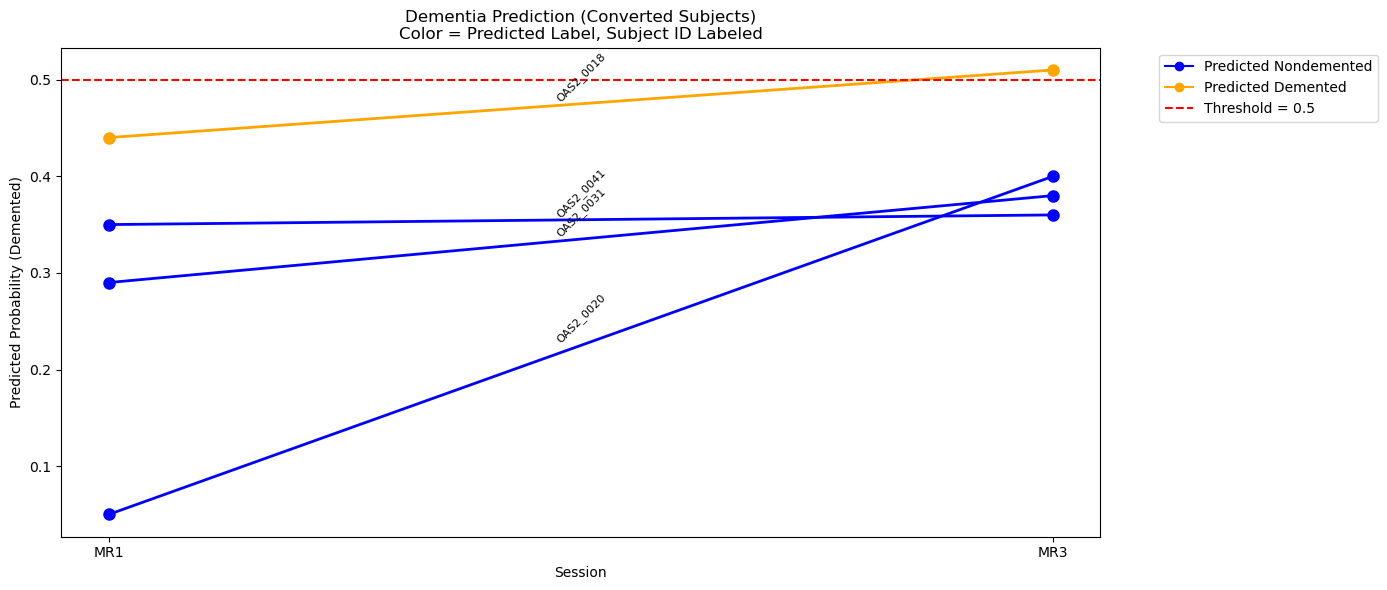

In [53]:
# Plot with subject IDs labeled on each line (without MMSE)

plt.figure(figsize=(14, 6))

# Sort data
test_df_sorted = test_df.sort_values(by=['SubID', 'Session'])

# Define color palette for predicted labels
palette = {0: 'blue', 1: 'orange'}

# Plot each subject's line and annotate with subject ID
for subid, group in test_df_sorted.groupby("SubID"):
    color = palette[group['Predicted_Label'].iloc[-1]]
    plt.plot(
        group['Session'],
        group['Predicted_Prob_Demented'],
        marker='o',
        color=color,
        linewidth=2,
        markersize=8
    )

    # Annotate subject ID in the middle of the line
    if len(group) == 2:
        x_pos = 0.5  # halfway between MR1 and MR3
        y_pos = group['Predicted_Prob_Demented'].mean()
        plt.text(
            x_pos,
            y_pos,
            subid,
            fontsize=8,
            ha='center',
            va='bottom',
            rotation=45
        )

# Formatting
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Dementia Prediction (Converted Subjects)\nColor = Predicted Label, Subject ID Labeled")
plt.ylabel("Predicted Probability (Demented)")
plt.xlabel("Session")
plt.xticks(ticks=[0, 1], labels=["MR1", "MR3"])
legend_handles = [plt.Line2D([0], [0], color='blue', marker='o', label='Predicted Nondemented'),
                  plt.Line2D([0], [0], color='orange', marker='o', label='Predicted Demented'),
                  plt.Line2D([0], [0], color='red', linestyle='--', label='Threshold = 0.5')]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### classification with MMSE

In [35]:
# Separate data by group for train/test split
train_df = df[df['Group'].isin(['Demented', 'Nondemented'])]
test_df = df[df['Group'] == 'Converted']

# Encode target labels for training
train_df['Label'] = train_df['Group'].map({'Nondemented': 0, 'Demented': 1})

# Define feature columns (exclude non-feature ones)
non_feature_cols = ['SubID', 'Session', 'Group', 'MRI_ID', 'Label']
feature_cols = [col for col in train_df.columns if col not in non_feature_cols]

# Prepare training and test data
X_train = train_df[feature_cols]
y_train = train_df['Label']
X_test = test_df[feature_cols]

# Run a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on converted subjects
converted_preds = clf.predict(X_test)
converted_probs = clf.predict_proba(X_test)[:, 1]  # probability of Demented

# Add predictions to test_df for inspection
test_df = test_df.copy()
test_df['Predicted_Label'] = converted_preds
test_df['Predicted_Prob_Demented'] = converted_probs

test_df[['SubID', 'Session', 'Predicted_Label', 'Predicted_Prob_Demented']].head()

/tmp/ipykernel_254/3913094717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Label'] = train_df['Group'].map({'Nondemented': 0, 'Demented': 1})


,SubID,Session,Predicted_Label,Predicted_Prob_Demented
12,OAS2_0018,MR1,0,0.24
13,OAS2_0018,MR3,0,0.28
14,OAS2_0020,MR1,0,0.03
15,OAS2_0020,MR3,1,0.61
18,OAS2_0031,MR1,0,0.14


In [37]:
test_df

,SubID,Session,Amygdala,CSF,Cerebellum-Cortex,Cerebral-White-Matter,Hippocampus,Inf-Lat-Vent,Lateral-Ventricle,WM-hypointensities,...,precentral,precuneus,superiorfrontal,superiortemporal,supramarginal,MRI_ID,Group,MMSE,Predicted_Label,Predicted_Prob_Demented
12,OAS2_0018,MR1,0.014442,0.009686,0.567007,2.040011,0.038278,0.010240,0.312680,0.022429,...,0.128049,0.095403,0.241643,0.174254,0.109690,OAS2_0018_MR1,Converted,30.0,0,0.24
13,OAS2_0018,MR3,0.013423,0.009489,0.555152,2.044624,0.037551,0.011098,0.332254,0.021815,...,0.128788,0.096554,0.239271,0.171554,0.108540,OAS2_0018_MR3,Converted,29.0,0,0.28
14,OAS2_0020,MR1,0.017947,0.008953,0.602531,2.416813,0.043190,0.010318,0.276011,0.034463,...,0.138825,0.102991,0.280172,0.165218,0.112551,OAS2_0020_MR1,Converted,29.0,0,0.03
15,OAS2_0020,MR3,0.015068,0.009590,0.601411,2.285808,0.038135,0.015306,0.328344,0.053948,...,0.135010,0.094974,0.270486,0.158101,0.107956,OAS2_0020_MR3,Converted,26.0,1,0.61
18,OAS2_0031,MR1,0.015938,0.007957,0.587273,2.108294,0.036806,0.017363,0.326610,0.034052,...,0.140584,0.091904,0.264084,0.173169,0.101417,OAS2_0031_MR1,Converted,30.0,0,0.14
19,OAS2_0031,MR3,0.014734,0.008303,0.562561,2.033627,0.034285,0.022811,0.376749,0.061858,...,0.139886,0.089478,0.259691,0.171000,0.101256,OAS2_0031_MR3,Converted,28.0,0,0.39
28,OAS2_0041,MR1,0.015610,0.007468,0.573832,2.310634,0.041711,0.004357,0.123817,0.014389,...,0.140071,0.094271,0.255668,0.169069,0.127220,OAS2_0041_MR1,Converted,27.0,0,0.41
29,OAS2_0041,MR3,0.014848,0.007743,0.573528,2.256119,0.039476,0.005066,0.132233,0.016713,...,0.136876,0.095189,0.252312,0.167829,0.126344,OAS2_0041_MR3,Converted,28.0,0,0.33


#### train on Hippocampus, entorhinal, Amygdala, middletemporal, CSF

In [40]:
# Separate data by group for train/test split
train_df = df[df['Group'].isin(['Demented', 'Nondemented'])]
test_df = df[df['Group'] == 'Converted']

# Encode target labels for training
train_df['Label'] = train_df['Group'].map({'Nondemented': 0, 'Demented': 1})

# Define feature columns (exclude non-feature ones)
# non_feature_cols = ['SubID', 'Session', 'Group', 'MRI_ID', 'Label']
# feature_cols = [col for col in train_df.columns if col not in non_feature_cols]
feature_cols = ['Hippocampus', 'entorhinal', 'Amygdala', 'middletemporal', 'CSF']

# Prepare training and test data
X_train = train_df[feature_cols]
y_train = train_df['Label']
X_test = test_df[feature_cols]

# Run a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on converted subjects
converted_preds = clf.predict(X_test)
converted_probs = clf.predict_proba(X_test)[:, 1]  # probability of Demented

# Add predictions to test_df for inspection
test_df = test_df.copy()
test_df['Predicted_Label'] = converted_preds
test_df['Predicted_Prob_Demented'] = converted_probs

test_df[['SubID', 'Session', 'Predicted_Label', 'Predicted_Prob_Demented']].head()

/tmp/ipykernel_254/383433034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Label'] = train_df['Group'].map({'Nondemented': 0, 'Demented': 1})


,SubID,Session,Predicted_Label,Predicted_Prob_Demented
12,OAS2_0018,MR1,0,0.22
13,OAS2_0018,MR3,0,0.29
14,OAS2_0020,MR1,0,0.05
15,OAS2_0020,MR3,0,0.34
18,OAS2_0031,MR1,0,0.25


In [41]:
test_df

,SubID,Session,Amygdala,CSF,Cerebellum-Cortex,Cerebral-White-Matter,Hippocampus,Inf-Lat-Vent,Lateral-Ventricle,WM-hypointensities,...,precentral,precuneus,superiorfrontal,superiortemporal,supramarginal,MRI_ID,Group,MMSE,Predicted_Label,Predicted_Prob_Demented
12,OAS2_0018,MR1,0.014442,0.009686,0.567007,2.040011,0.038278,0.010240,0.312680,0.022429,...,0.128049,0.095403,0.241643,0.174254,0.109690,OAS2_0018_MR1,Converted,30.0,0,0.22
13,OAS2_0018,MR3,0.013423,0.009489,0.555152,2.044624,0.037551,0.011098,0.332254,0.021815,...,0.128788,0.096554,0.239271,0.171554,0.108540,OAS2_0018_MR3,Converted,29.0,0,0.29
14,OAS2_0020,MR1,0.017947,0.008953,0.602531,2.416813,0.043190,0.010318,0.276011,0.034463,...,0.138825,0.102991,0.280172,0.165218,0.112551,OAS2_0020_MR1,Converted,29.0,0,0.05
15,OAS2_0020,MR3,0.015068,0.009590,0.601411,2.285808,0.038135,0.015306,0.328344,0.053948,...,0.135010,0.094974,0.270486,0.158101,0.107956,OAS2_0020_MR3,Converted,26.0,0,0.34
18,OAS2_0031,MR1,0.015938,0.007957,0.587273,2.108294,0.036806,0.017363,0.326610,0.034052,...,0.140584,0.091904,0.264084,0.173169,0.101417,OAS2_0031_MR1,Converted,30.0,0,0.25
19,OAS2_0031,MR3,0.014734,0.008303,0.562561,2.033627,0.034285,0.022811,0.376749,0.061858,...,0.139886,0.089478,0.259691,0.171000,0.101256,OAS2_0031_MR3,Converted,28.0,0,0.16
28,OAS2_0041,MR1,0.015610,0.007468,0.573832,2.310634,0.041711,0.004357,0.123817,0.014389,...,0.140071,0.094271,0.255668,0.169069,0.127220,OAS2_0041_MR1,Converted,27.0,0,0.45
29,OAS2_0041,MR3,0.014848,0.007743,0.573528,2.256119,0.039476,0.005066,0.132233,0.016713,...,0.136876,0.095189,0.252312,0.167829,0.126344,OAS2_0041_MR3,Converted,28.0,0,0.47
